# Introduction to Information Theory

## Exercise 1

(entropy, implementation)

Consider two fair dice with 6 sides each.

1. Print the probability distribution of the sum $S$ of the numbers obtained by throwing the two dice.
1. What is the information content in bits of the events $S=2$, $S=11$, $S=5$, $S=7$.
1. Calculate the entropy of S.
1. Lets say you throw the die one at a time, and the first die shows 4. What is the entropy of S after this observation? Was any information gained/lost in the process of observing the outcome of the first die toss? If so, calculate how much information (in bits) was lost or gained.

## Exercise 2

(information gain, implementation or analysis)

Given the dataset below, calculate the information gain for the target variable 'Edible' and each feature ('Weight', 'Smell', 'Spots', 'Smooth'):

In [25]:
from scipy.stats import entropy
import pandas as pd
import math

def H(p):
    log_zero = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(i*log_zero(i) for i in p)

features = ['Weight', 'Smell', 'Spots', 'Smooth', 'Edible']
mushrooms = pd.DataFrame([
  (1, 0, 0, 0, 1),
  (1, 0, 1, 0, 1),
  (0, 1, 0, 1, 1),
  (0, 0, 0, 1, 0),
  (1, 1, 1, 0, 0),
  (1, 0, 1, 1, 0),
  (1, 0, 0, 1, 0),
  (0, 1, 0, 0, 0)
],
index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
columns=features)
print(mushrooms)

n_observations = mushrooms.shape[0]

probs_edible = [sum(mushrooms["Edible"] == 1) / n_observations, sum(mushrooms["Edible"] == 0) / n_observations]
probs_edible_smooth = [sum((mushrooms["Edible"] == 1) & (mushrooms["Smooth"] == 1)) / sum(mushrooms["Smooth"] == 1), sum((mushrooms["Edible"] == 0) & (mushrooms["Smooth"] == 1)) / sum(mushrooms["Smooth"] == 1)]
probs_edible_not_smooth = [sum((mushrooms["Edible"] == 1) & (mushrooms["Smooth"] == 0)) / sum(mushrooms["Smooth"] == 0), sum((mushrooms["Edible"] == 0) & (mushrooms["Smooth"] == 0)) / sum(mushrooms["Smooth"] == 0)]
probs_smooth = [sum(mushrooms["Smooth"] == 0) / n_observations, sum(mushrooms["Smooth"] == 1) / n_observations]
H_edible_smooth = probs_smooth[1] * H(probs_edible_smooth) + probs_smooth[0] * H(probs_edible_not_smooth)

# ^^^
# Analog pt celelalte trasaturi ale ciupercilor
# Putem construi o functie pentru a prelua probabilitatile mai usor pentru fiecare trasatura
# 
#
# Pentru a calcula IG(X) avem nevoie de H(X) si H(X|Y) , calculam diferenta dintre cele doua entropii , rezultatul fiind castigul de informatie atunci cand avem entropie conditionata


ig_edible_smooth = H(probs_edible) - H_edible_smooth
print("IG(Edible; Smooth) =" ,ig_edible_smooth)

   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0
IG(Edible; Smooth) = 0.04879494069539858


## Exercise 3

(entropy and information gain, implementation or analysis)

The following code simulates the season results for football team F:

In [32]:
from itertools import product
import pandas as pd
import random
random.seed(1)

def H(p):
    log_zero = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(i*log_zero(i) for i in p)

opponents = ['Team '+chr(ord('A') + i) for i in range(5)]
stadiums = ['Home', 'Away']
games = pd.DataFrame(list(product(opponents, stadiums))*2,
                     columns=['opponent', 'stadium'])
games['result'] = random.choices(["Win", "Loss", "Draw"],
                                 k=len(games))
games
k = len(games)
p_result = [sum(games["result"] == "Win") / k, sum(games["result"] == "Loss") / k,  sum(games["result"] == "Draw") / k]
p_stadium = [sum(games["stadium"] == "Home") / k, sum(games["stadium"] == "Away") / k]
p_opponent = [sum(games["opponent"] == "Team A") / k, sum(games["opponent"] == "Team B") / k,sum(games["opponent"] == "Team C") / k,sum(games["opponent"] == "Team D") / k,sum(games["opponent"] == "Team E") / k]

# H(result|stadium)
probs_result_stadium_home = [sum((games["result"] == "Win") & (games["stadium"] == "Home")) / sum(games["stadium"] == "Home"), sum((games["result"] == "Loss") & (games["stadium"] == "Home")) / sum(games["stadium"] == "Home"), sum((games["result"] == "Draw") & (games["stadium"] == "Home")) / sum(games["stadium"] == "Home")]
probs_result_stadium_away = [sum((games["result"] == "Win") & (games["stadium"] == "Away")) / sum(games["stadium"] == "Away"), sum((games["result"] == "Loss") & (games["stadium"] == "Away")) / sum(games["stadium"] == "Away"), sum((games["result"] == "Draw") & (games["stadium"] == "Away")) / sum(games["stadium"] == "Away")]
H_result_stadium = p_stadium[1] * H(probs_result_stadium_home) + p_stadium[0] * H(probs_result_stadium_away)
print("H(result|stadium) = " + str(H_result_stadium))

# H(result|opponent)
probs_result_opponent_A = [sum((games["result"] == "Win") & (games["opponent"] == "Team A")) / sum(games["opponent"] == "Team A"), sum((games["result"] == "Loss") & (games["opponent"] == "Team A")) / sum(games["opponent"] == "Team A"), sum((games["result"] == "Draw") & (games["opponent"] == "Team A")) / sum(games["opponent"] == "Team A")]
probs_result_opponent_B = [sum((games["result"] == "Win") & (games["opponent"] == "Team B")) / sum(games["opponent"] == "Team B"), sum((games["result"] == "Loss") & (games["opponent"] == "Team B")) / sum(games["opponent"] == "Team B"), sum((games["result"] == "Draw") & (games["opponent"] == "Team B")) / sum(games["opponent"] == "Team B")]
probs_result_opponent_C = [sum((games["result"] == "Win") & (games["opponent"] == "Team C")) / sum(games["opponent"] == "Team C"), sum((games["result"] == "Loss") & (games["opponent"] == "Team C")) / sum(games["opponent"] == "Team C"), sum((games["result"] == "Draw") & (games["opponent"] == "Team C")) / sum(games["opponent"] == "Team C")]
probs_result_opponent_D = [sum((games["result"] == "Win") & (games["opponent"] == "Team D")) / sum(games["opponent"] == "Team D"), sum((games["result"] == "Loss") & (games["opponent"] == "Team D")) / sum(games["opponent"] == "Team D"), sum((games["result"] == "Draw") & (games["opponent"] == "Team D")) / sum(games["opponent"] == "Team D")]
probs_result_opponent_E = [sum((games["result"] == "Win") & (games["opponent"] == "Team E")) / sum(games["opponent"] == "Team E"), sum((games["result"] == "Loss") & (games["opponent"] == "Team E")) / sum(games["opponent"] == "Team E"), sum((games["result"] == "Draw") & (games["opponent"] == "Team E")) / sum(games["opponent"] == "Team E")]

H_result_opponent = p_opponent[0] * H(probs_result_opponent_A) + p_opponent[1] * H(probs_result_opponent_B) +p_opponent[2] * H(probs_result_opponent_C) + p_opponent[3] * H(probs_result_opponent_D) + p_opponent[4] * H(probs_result_opponent_E)
print("H(result|opponent) = " + str(H_result_opponent))

# IG(result;stadium) and IG(result;opponent)
ig_result_stadium = H(p_result) - H_result_stadium
ig_result_opponent = H(p_result) - H_result_opponent

print(ig_result_stadium)
print(ig_result_opponent)

# If we run this, we find out that it is more important to know the opponent in deciding the result of the game instead of the stadium . So to answer question 3, the variable opponent is more important in deciding the result of a game 

print("H(result) =", H(p_result))

H(result|stadium) = 1.5464393446710152
H(result|opponent) = 1.1245112497836531
0.01243250377434535
0.4343605986617074
H(result) = 1.5588718484453605


1. What is the entropy of the `result` $H(result)$ (ignoring all other variables)?
1. What are the average conditional entropies $H(result | stadium)$ and $H(result | opponent)$?
1. Which of the two variables is more important in deciding the result of a game? Answer this question by calculating the information gain for the two variables: $IG(result; stadium)$ and $IG(result;opponent)$.

# Exercise 4

(entropy, implementation or analysis)

Consider the random variable $C$ "a person has a cold" and the random variable $T$ "outside temperature". The joint distribution of the two variables is given below:

In [58]:
import pandas as pd

def H(p):
    log_zero = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(i*log_zero(i) for i in p)
features = ['T_Sunny','T_Rainy','T_Snowy']
d = pd.DataFrame({'T_Sunny': [0.3, 0.05], 
                  'T_Rainy': [0.2, 0.15], 
                  'T_Snowy': [0.1, 0.2]}, 
                 index=['C_No', 'C_Yes'],
                 columns = features)
d





# Nu am mai calculat in functie de variable, le-am luat direct din tabela

p_sunny = [0.3,0.05]
p_rainy = [0.2,0.15]
p_snowy = [0.1,0.2]

probs_notCold = [0.3,0.2,0.1]
probs_yesCold = [0.05,0.15,0.2]

p_person_is_cold = [0.6,0.4]
p_outside_temp = [0.35,0.35,0.3]

# H(C)
print("H(C) = " + str(H(p_person_is_cold)))
print("H(T) = " + str(H(p_outside_temp)))

H(C) = 0.9709505944546686
H(T) = 1.5812908992306927


1. Plot the pmf of $C$ and $T$.
1. Calculate $H(C)$, $H(T)$.
1. Calculate $H(C|T)$, $H(T|C)$. Does the temperature (T) reduce the uncertainty regarding someone having a cold (C)?

# Exercise 5

(decision tree, implementation)

Consider the Boolean expression $A \lor (B \land C)$. The corresponding truth table can be generated with:

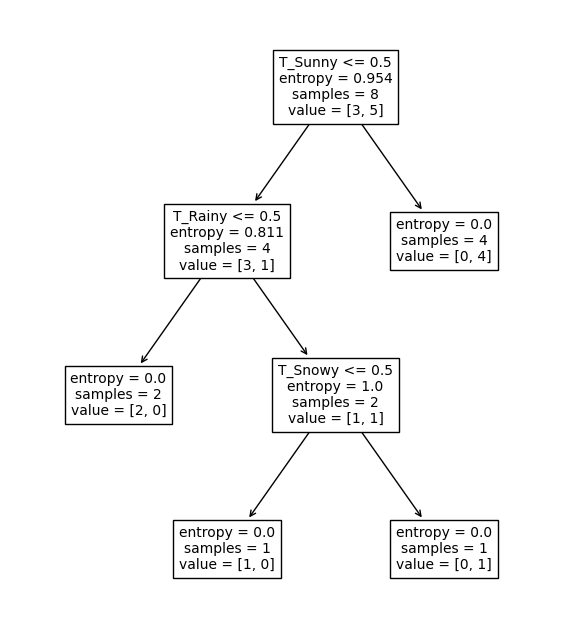

In [61]:
from itertools import product
from sklearn import tree
import matplotlib.pyplot as plt

X = [list(c) for c in product([0,1], repeat=3)]
y = [A or (B and C) for A, B, C in X]



fig, ax = plt.subplots(figsize=(7, 8))
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=features)
plt.show()

1. Fit a decision tree classifier on the truth table above and visualise the resulting tree. Make sure to use the entropy as a metric.
1. Is the tree above optimal? Can you find a decision tree with fewer levels or nodes that correctly represents this function?